---
---
<p style="text-align:center"><font size='7'><span style="color:red">Mini Project<br/>Problem: travel planning</span><br/>
<font size = '5'>

---
---

<font size = 6>
<span style="color:#7FFFD4">Data travel planning</span><br/>

<font size = 5>

* use minimum cost
* travel many cities as many as we can
* stay within 14 days

| City | Days to stay | Cost |
| -------- | ------- | ------- |
| City A | 3 |  80 |
| City B | 4 |  85 |
| City C | 5 | 100 |
| City D | 2 |  45 |
| City E | 3 |  75 |
| City F | 1 |  25 |
| City G | 6 | 148 |
| City H | 8 | 205 |
| City I | 1 |  24 |
| City J | 7 | 200 |

In [129]:
city_data = [("City A", 3, 80), ("City B", 4, 85), 
             ("City C", 5, 100), ("City D", 2, 45),
             ("City E", 3, 75), ("City F", 1, 25), 
             ("City G", 6, 148), ("City H", 8, 205),
             ("City I", 1, 24), ("City J", 7, 200)]

<font size = 6>
<span style="color:#7FFFD4">1. BRUTE-FORCE</span><br/>

<font size = 5>


### Brute force จะหา solution ทั้งหมดที่เป็นไปได้(โดยใช้ combinations จาก itertools เข้ามาช่วยในการ generate solution ทั้งหมดเก็บไว้ใน list) จากนั้นจะเลือก solution ที่ต้องการออกมา โดยเรียง piority การพิจารณาดังนี้ num day => num city => cost

In [130]:
city_data = [("City A", 3, 80), ("City B", 4, 85), 
             ("City C", 5, 100), ("City D", 2, 45),
             ("City E", 3, 75), ("City F", 1, 25), 
             ("City G", 6, 148), ("City H", 8, 205),
             ("City I", 1, 24), ("City J", 7, 200)]

In [131]:
from itertools import combinations

def Brute_force(city_data):
    best_score = 1000
    visited = []

    for i in range(1, len(city_data) + 1):
        for combination in combinations(city_data, i):
            total_days = 0
            total_cost = 0
            visited_cities = []
            for city in combination:
                if total_days + city[1] <= 14:
                    visited_cities.append(city[0])
                    total_days += city[1]
                    total_cost += city[2]
            if len(visited_cities) > len(visited):
                best_cost = total_cost
                visited = visited_cities
    return visited, best_cost, total_days

if __name__ == '__main__':
    visited, cost, days = Brute_force(city_data)
    print('visited: ', visited)
    print('cost: ', cost)
    print('days', days)

visited:  ['City A', 'City B', 'City D', 'City E', 'City F', 'City I']
cost:  334
days 14


<font size = 6>
<span style="color:#7FFFD4">2. DYNAMIC PROGRAMMING</span><br/>

<font size = 5>


In [132]:
def Knapsack_travel_plan(days, cities):
    n = len(cities)
    day = days
    # กำหนดตัวแปร K เป็นการสร้าง array เก็บข้อมูล 
    K = [[float('inf')]*(days+1) for _ in range(n+1)]
    for i in range(n+1):
        K[i][0] = 0
    for i in range(1, n+1):
        for j in range(1, days+1):
            if cities[i-1][1] <= j:
                K[i][j] = min(K[i-1][j], K[i-1][j-cities[i-1][1]] + cities[i-1][2])
            else:
                K[i][j] = K[i-1][j]

    # travel_plan 
    travel_plan = []
    total_cost = 0
    while n > 0 and days > 0:
        if K[n][days] != K[n-1][days]:
            travel_plan.append(cities[n-1][0])
            total_cost += cities[n-1][2]
            days -= cities[n-1][1]
        n -= 1
    travel_plan.reverse()
    
    return travel_plan, total_cost,(day-days)

In [133]:
days = 14 

if __name__ == '__main__':
    travel_plan, total_cost, days = Knapsack_travel_plan(days, city_data)
    print("Traveling plan:",travel_plan)
    print("Total cost:",total_cost)
    print('day:',days)

Traveling plan: ['City B', 'City C', 'City D', 'City E']
Total cost: 305
day: 14


In [1]:
city_data = [("City A", 3, 80), ("City B", 4, 85),
             ("City C", 5, 100), ("City D", 2, 45),
             ("City E", 3, 75), ("City F", 1, 25),
             ("City G", 6, 148), ("City H", 8, 205),
             ("City I", 1, 24), ("City J", 7, 200)]

def find_max_cities(city_data, max_days):
    num_cities = len(city_data)

    dp = [[0] * (max_days + 1) for _ in range(num_cities + 1)]

    for i in range(1, num_cities + 1):
        city, days_required, _ = city_data[i - 1]
        for j in range(1, max_days + 1):
            if days_required <= j:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - days_required] + 1)
            else:
                dp[i][j] = dp[i - 1][j]

    path = []
    total_cost = 0
    i, j = num_cities, max_days

    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            city, day, cost = city_data[i - 1]
            path.append(city)
            total_cost += cost
            j -= city_data[i - 1][1]
        i -= 1

    return path, total_cost

In [26]:
days = 14

if __name__ == '__main__':
    travel_plan, total_cost= find_max_cities(city_data, days)
    print("Traveling plan:",travel_plan)
    print("Total cost:",total_cost)
    print('day:',days)

Traveling plan: ['City I', 'City F', 'City E', 'City D', 'City B', 'City A']
Total cost: 334
day: 14


<font size = 6>
<span style="color:#7FFFD4">3. GREEDY ALGORITHM</span><br/>
<br/>
<font size = 5>

Greedy algorithm จะเลือก solution ที่คุ้มค่ามากที่สุดก่อน โดยความคุ้มค่าในที่นี้จะมองเป็น num city (ยิ่งไปได้หลายเมืองยิ่งคุ้มค่า โดยจำกัดเวลา 14 วัน) ดังนั้น จึงทำการ sort ข้อมูลค่าใช้จ่าย(cost) ใน list จากน้อยไปมาก(ใช้ lambda เข้าช่วยในการ sort ข้อมูลใน sublist) จากนั้นจะเลือกไปเมืองที่ค่าใช้จ่ายน้อยที่สุดและไปเมืองต่อไปที่ค่าใช้จ่ายถูกสุดรองลงมา (หากไปเมืองที่ค่าใช้จ่ายน้อยที่สุด = จะไปได้หลายเมืองกว่าไปเมืองที่ค่าใช้จ่ายสูง)

In [134]:
city_data = [("City A", 3, 80), ("City B", 4, 85), 
             ("City C", 5, 100), ("City D", 2, 45),
             ("City E", 3, 75), ("City F", 1, 25), 
             ("City G", 6, 148), ("City H", 8, 205),
             ("City I", 1, 24), ("City J", 7, 200)]

In [135]:
def Greedy_maximumcity_travel(city_data):
    total_cost = 0
    total_days = 0
    cities_visited = []

    # เรียงลำดับข้อมูลของ cost  จากน้อยไปมาก 
    sorted_cities = sorted(city_data, key=lambda x: x[2])

    for city in sorted_cities:
        if total_days + city[1] <= 14:
            cities_visited.append(city[0])
            total_days += city[1]
            total_cost += city[2]

    return cities_visited, total_days, total_cost

In [136]:
if __name__ == '__main__':
    cities_visited, total_days, total_cost = Greedy_maximumcity_travel(city_data)

    print("Cities visited:", cities_visited)
    print("Total days:", total_days)
    print("Total cost:", total_cost)

Cities visited: ['City I', 'City F', 'City D', 'City E', 'City A', 'City B']
Total days: 14
Total cost: 334


<font size = 6>
<span style="color:#7FFFD4">4. GENETIC ALGORITHM</span><br/>

<font size = 5>


<font size = 5>

Genetic algorithm เป็นการหา solution โดยการเลียนแบบพฤติกรรมการคัดเลือกในธรรมชาติของสิ่งมีชีวิต

In [137]:
city_data = [("City A", 3, 80), ("City B", 4, 85), 
             ("City C", 5, 100), ("City D", 2, 45),
             ("City E", 3, 75), ("City F", 1, 25), 
             ("City G", 6, 148), ("City H", 8, 205),
             ("City I", 1, 24), ("City J", 7, 200)]

Province = ["City A","City B","City C","City D","City E","City F","City G","City H","City I","City J"]

## Phase1: Initial Population


<font size = 5>
เริ่มสุ่มประชากร โดยที่ประชากรแต่ละตัว จะแทน solution ต่างๆที่เป็นได้

In [138]:
import random
import copy

def generatepop(Numpop):
    population = []
    for _ in range(Numpop):
        population.append([random.choice([0,1]) for _ in range(len(city_data))])

    return population

def encoding(pop):
    encode_pop = copy.deepcopy(pop)

    for j in range(len(encode_pop)): # change 0 to city
        if encode_pop[j] == 1:
            encode_pop[j] = Province[j]
    n = 0
    while n < len(encode_pop): # get 0 out
        if encode_pop[n] == 0:
            del encode_pop[n]
        else:
            n+=1

    return encode_pop

def decoding(pop):
    decode_pop = [0 for _ in range(10)]
    deep_pop = copy.deepcopy(pop)

    for i in range(len(deep_pop)):
        if deep_pop[i] in Province:
            decode_pop[Province.index(deep_pop[i])] = 1

    return decode_pop

## Phase2: Selection for breeding offsprings

<font size = 5>
ประชากรแต่ละตัวที่สุ่มมาจะมีความแข็งแกร่งที่แตกต่างกัน สามารถวัดได้จากฟังก์ชันวัดค่าความแข็งแกร่ง (fitness function) 

ความแข็งแกร่งในที่นี้คือ จำนวนวัน <= 14, จำนวนเมืองมาก, ค่าใช้จ่ายน้อย <br/>
สมการวัดความแข็งแกร่ง = [(num_city + 1000/cost)]*(num day/14)

In [139]:
def OBJ_func(chrom):
    cost = 0
    day = 0
    for i in range(len(chrom)):
        cost += city_data[i][2] * chrom[i]
        day += city_data[i][1] * chrom[i]
    return day, cost

# use cost for compute fitness value, higher value, higher fit
def fitness(individual):
    #print(OBJ_func(individual)[1])
    if sum(individual) == 0 or OBJ_func(individual)[0] > 14:
        return -1
    return (sum(individual)+(float(('%.4f'%(1000/(OBJ_func(individual)[1]))))))*(OBJ_func(individual)[0]/14)
    #return 1/(1+2.7**(-1*(float(('%.4f'%(10000/(OBJ_func(individual)[1])))))))

<font size = 5>

ประชากรที่แข็งแกร่งจะมีโอกาสได้รับเลือกไปขยายประชากรต่อ ผ่านการหมุนวงล้อคัดเลือก

หลังจากเลือกประชากรมาแล้ว จะถูกนำไปขยายประชากรผ่านการ crossover และ mutation <br/>
โดย crossover จะใช้ประชากรตั้งต้น 2 ตัว และจะได้ประชากรใหม่ 2 ตัว(เกิดจากการนำ subsolution บางค่า มาแลกเปลี่ยนกัน)<br/>
และ mutation จะใช้ประชากรตั้งต้น 1 ตัว และจะได้ประชากรใหม่ 1 ตัว(เกิดจากการนำ subsolution บางค่า มาสลับที่กัน)<br/>

In [140]:
def roulette_wheel_selection(population):
      survive = [fitness(individual) for individual in population ]
      max = sum(survive)
      percent_survive = [float('%.4f'%(surv/max)) for surv in survive]

      roulette = []
      for i in range(len(percent_survive)):
            percent_survive[i] *= 1000
            percent_survive[i] = int(percent_survive[i])
            for j in range(percent_survive[i]):
                  roulette.append(i)

      select = random.choice(roulette)
      #print('Select population[{0}]: {1} with probabily:{2:.4f} '
      #    .format(select,population[select] , percent_survive[select]/1000))
      return population[select]

def select_parent_population(population,k):
    selected_parents = []
    for i in range(k):
        selected_parent = roulette_wheel_selection(population)
        selected_parents.append(selected_parent)
    return selected_parents

def crossover(parent1,parent2):
    parent1 = list(parent1)
    parent2 = list(parent2)

    # crossover point
    cp = random.randint(1,len(parent1)-1) 
    
    offspring1,offspring2 = parent1[:cp],parent2[:cp]
    offspring1.extend(parent2[cp:])
    offspring2.extend(parent1[cp:])
    #print('Offspring1: {0} , Offspring2: {1} cp: {2}'.format(offspring1,offspring2,cp))
    #print('Offspring1: {0} , Offspring2: {1}'.format(decode(offspring1),decode(offspring2)))
    return offspring1,offspring2

def mutation(parent):
    '''Randomly swap position'''
    mutated_ind = list()
    mp1 = random.randint(0,len(parent)-1)
    mp2 = random.randint(0,len(parent)-1)
    mutated_ind[:] = parent[:]
    mutated_ind[mp1],mutated_ind[mp2] = mutated_ind[mp2],mutated_ind[mp1]
    #print('Swap position {0} and {1} = Mutated: {2}'.format(mp1,mp2,mutated_ind))
    #print('Swap position {0} and {1} = Mutated: {2}'.format(mp1,mp2,decode(mutated_ind)))
    return mutated_ind

In [141]:
def breeding_offspring(population,num_cross,num_mutate):
    #Crossover operation
    #print('----------- Crossover -----------')
    selected_parents = select_parent_population(population,num_cross)
    for i in range(int(num_cross/2)):
        offspring1, offspring2 = crossover(selected_parents[i*2],selected_parents[i*2+1])
        population.extend([offspring1,offspring2])
    #Mutantation operation
    #print('----------- Mutation ------------')
    mutated_inds = []
    for i in range(num_mutate):
        rand_ind = random.randint(0,len(population)-1)
        '''print('Mutating Population[{0}]: {1}'.format(rand_ind,(population[rand_ind])))'''
        mutated_ind = mutation(population[rand_ind])
        mutated_inds.append(mutated_ind)
    population.extend(mutated_inds)
    '''print('-----------------------')'''

## Phase3: Evaluation of a population

<font size = 5>
หลังจากได้รับประชากรเพิ่มมาแล้ว จะทำการตัดประกรที่อ่อนแอที่สุดออกไปเท่ากับจำนวนที่เพิ่มเข้ามา

In [142]:
def update_population(population, num_pop):
    num_kill_pop = len(population) - num_pop

    evaluation = [fitness(i) for i in population]
    for i in range(num_kill_pop):
        kill_pop = evaluation.index(min(evaluation))
        evaluation.remove(min(evaluation))
        population.remove(population[kill_pop])
    
    evaluation = [fitness(i) for i in population]
    max_fitness_value = max(evaluation)
    max_fit_pop = population[evaluation.index(max(evaluation))]

    #evaluation = [fitness(i) for i in population]
    #max_fitness_value = max(evaluation)
    return max_fit_pop, max_fitness_value

### เป็นอันจบ 1 cycle หลังจาก run ไปหลายๆ cycle จะได้ประชากรที่มีความแข็งแกร่งเพิ่มขึ้นเรื่อยๆ เมื่อครบตามจำนวนรอบที่กำหนดไว้ จะนำประชากรที่มีค่า fitness สูงที่สุดมาเป็นคำตอบ

# Genetic Algorithm Run

In [143]:
def GA_RUN(num_iteration, num_pop, num_cross, num_mutate):
    pocket = []
    round = 0
    # Generate Population Generation[0]
    population = generatepop(num_pop)
    
    # Loop for breeding and update population
    for iter in range(num_iteration):   

        breeding_offspring(population,num_cross,num_mutate)
        max_fit_pop,max_fitness_value = update_population(population,num_pop)
        
        pocket.append(max_fitness_value)
        
        # display result at Generation[i]
        round+=1
        print('-------------------- {} --------------------'.format(round))
        print(max_fit_pop,max_fitness_value)
        print(encoding(max_fit_pop))
        print(OBJ_func(max_fit_pop))
    return max_fit_pop, pocket

In [144]:
num_iteration = 100
num_pop = 20
num_cross = 12
num_mutate = 8

if __name__ == '__main__':
    GA, pocket = GA_RUN(num_iteration, num_pop, num_cross, num_mutate)
    print(GA)

-------------------- 1 --------------------
[0, 1, 0, 1, 1, 1, 0, 0, 1, 0] 7.021928571428571
['City B', 'City D', 'City E', 'City F', 'City I']
(11, 254)
-------------------- 2 --------------------
[0, 1, 0, 1, 1, 1, 0, 0, 1, 0] 7.021928571428571
['City B', 'City D', 'City E', 'City F', 'City I']
(11, 254)
-------------------- 3 --------------------
[0, 1, 0, 1, 1, 1, 0, 0, 1, 0] 7.021928571428571
['City B', 'City D', 'City E', 'City F', 'City I']
(11, 254)
-------------------- 4 --------------------
[0, 0, 1, 1, 1, 1, 0, 0, 1, 0] 7.472142857142856
['City C', 'City D', 'City E', 'City F', 'City I']
(12, 269)
-------------------- 5 --------------------
[0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 7.572128571428572
['City D', 'City E', 'City F', 'City G', 'City I']
(13, 317)
-------------------- 6 --------------------
[0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 7.572128571428572
['City D', 'City E', 'City F', 'City G', 'City I']
(13, 317)
-------------------- 7 --------------------
[1, 0, 1, 0, 1, 1, 0, 0, 1, 0] 7

### กราฟแสดงความสัมพันธ์ระหว่างจำนวนรอบและค่าความแข็งแกร่ง

Text(0, 0.5, 'Fitness value')

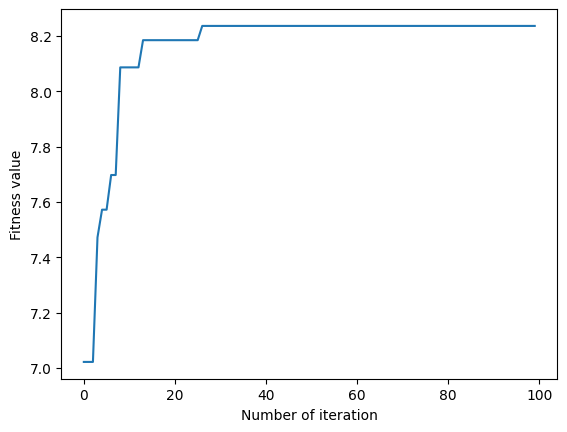

In [145]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(0,len(pocket))], pocket)
plt.xlabel('Number of iteration')
plt.ylabel('Fitness value')

### สังเกตว่า ยิ่งจำนวนรอบเพิ่มขึ้น จะทำให้ค่าความแข็งแกร่งเพิ่มขึ้นด้วย นั่นคือ ค่าความแข็งแกร่งแปรผันตรงกับจำนวนรอบ ซึ่งตรงตามหลักแนวคิดที่ระบุไว้ข้างต้น

---

# Particle swarm optimization

<font size = 6>
<span style="color:#7FFFD4">5. FISH SWARM ALGORITHM</span><br/>

<font size = 5>


### Fish Swarm Algorithm(FSA) เป็นวิธีการหา solution ที่เลียนแบบพฤติกรรมการดำรงชีวิตและหาอาหารของปลา ที่มีลักษณะการดำรงชีวิตเป็นฝูง

In [146]:
city_data = [("City A", 3, 80), ("City B", 4, 85), 
             ("City C", 5, 100), ("City D", 2, 45),
             ("City E", 3, 75), ("City F", 1, 25), 
             ("City G", 6, 148), ("City H", 8, 205),
             ("City I", 1, 24), ("City J", 7, 200)]

# Phase 1: Generate fish's position

### สุ่มสถานที่ที่ปลาอาศัยอยู่ โดยสถานที่ที่ปลาแต่ละตัวอาศัย จะแทน solution ต่างๆที่เป็นไปได้

In [147]:
import random
from statistics import mode

def fish_position(num_fish):
    position_fish = []
    for _ in range(num_fish):
        position_fish.append([random.choice([0,1]) for _ in range(len(city_data))])
    return position_fish

def prey_source_position(num_prey):
    prey_source = []
    for _ in range(num_prey):
        prey_source.append([random.choice([0,1]) for _ in range(len(city_data))])
    return prey_source

# Objective function and Fitness function (prey_density)

### FSA มีระบบให้คะแนนเฉกเช่นเดียวกับ GA แต่เป็นการให้คะแนนสถานที่ที่ปลาอาศัยตามปริมาณอาหารและจำนวนผู้ล่า (ยิ่งปริมาณอาหารมาก ยิ่งคะแนนมาก กลับกัน ยิ่งมีผู้ล่ามาก คะแนนจะน้อย) โดยกำหนดให้ num city = ปริมาณอาหาร, cost = จำนวนผู้ล่า

In [148]:
def OBJ_func(position_fish): # return tuple (days, cost, num_city) เข้า 1 
    days = 0
    cost = 0
    num_city = sum(position_fish)

    for i in range(len(position_fish)):
        days += city_data[i][1]*position_fish[i]
        cost += city_data[i][2]*position_fish[i]
    return (days,cost,num_city)

# higher cost = higher predator, many city = high prey
def prey_density(position_fish): # fitness เข้า1
    if OBJ_func(position_fish)[0] <= 14 and OBJ_func(position_fish)[0] != 0:
        
        # (num_city + 500/cost)(days/14)
        return (OBJ_func(position_fish)[2] + 1000/OBJ_func(position_fish)[1])*(OBJ_func(position_fish)[0]/14) 
    else:
        return 0

# convert list of [0,1] to list of ['city X']
def encoding(pop):
    encode_pop = copy.deepcopy(pop)
    for j in range(len(encode_pop)): # change 0 to city
        if encode_pop[j] == 1:
            encode_pop[j] = Province[j]
    n = 0
    while n < len(encode_pop): # get 0 out
        if encode_pop[n] == 0:
            del encode_pop[n]
        else:
            n+=1
    return encode_pop

# Phase 2: Find better position by using 4 fish Behavior

### ปลาจะมีพฤติกรรมต่างๆในการดำรงชีวิต โดยจะยกมา 4 พฤติกรรม ไว้สำหรับให้ปลาเลือกที่อยู่ใหม่ที่ดีกว่าเดิม (ในส่วนนี้ จะคล้ายๆกับการ crossover และ mutation ของ GA ซึ่งจะปรับให้ได้ solution ที่ดียิ่งขึ้น)

In [149]:
# ปลาเคลื่อนที่ไปตำแหน่งอื่นแบบสุ่ม
def random_moving_behavior(position_fish): # เข้า 10
    prey_source = prey_source_position(10)
    new_position_fish = []

    for i in range(len(position_fish)):
        rand = random.random()
        if rand > 0.5:
            new_position_fish.append(prey_source[random.randint(0,len(prey_source)-1)])
        else:
            new_position_fish.append(position_fish[i])
    return new_position_fish

# สุ่มหาตำแหน่งใหม่ที่มองเห็น ถ้ามีเหยื่อมาก จะเปลี่ยน position
def preying_behavior(position_fish): # เข้า 10
    new_position_fish = []
    for i in position_fish:
        n = 0
        prey_density_t0 = prey_density(i)
        prey_source = prey_source_position(10)
        prey_densitys = [prey_density(j) for j in prey_source]
        max_prey_density = prey_densitys.index(max(prey_densitys)) # max prey in vision
        if max_prey_density > prey_density_t0:
            i = prey_source[max_prey_density]
            new_position_fish.append(i)
        else:
            new_position_fish.append(i)
    return new_position_fish

# เช็คฐานนิยมของตำแหน่งที่ปลาอยู่มากที่สุด ที่นั่นมีแนวโน้มที่จะมีเหยื่อเยอะ
def swarmming_behavior(position_fish): # เข้า 10
    prey_densitys = [prey_density(j) for j in position_fish]
    swarm = mode(prey_densitys)
    index_swarm = prey_densitys.index(swarm)
    new_position_fish = []
    for i in range(len(position_fish)):
        if prey_densitys[index_swarm] > prey_density(position_fish[i]):
            new_position_fish.append(position_fish[index_swarm])
        else:
            new_position_fish.append(position_fish[i])
    return new_position_fish

# ปลาตัวที่อยู่ใกล้เคียงกับปลาที่มีเหยื่อในพื้นที่มากที่สุด จะตามไปยังพื้นที่นั้นด้วย
def following_behavior(position_fish):
    new_position_fish = position_fish
    prey_densitys = [prey_density(j) for j in position_fish]
    max_prey_density = prey_densitys.index(max(prey_densitys)) # max prey from 10 position

    # use if to protect index out of range
    if max_prey_density == 9: 
        new_position_fish[max_prey_density-1] = position_fish[max_prey_density]
    elif max_prey_density == 0:
        new_position_fish[max_prey_density+1] = position_fish[max_prey_density]
    else:
        new_position_fish[max_prey_density+1] = position_fish[max_prey_density]
        new_position_fish[max_prey_density-1] = position_fish[max_prey_density]
    return new_position_fish

# Phase 3: Update position

### หลังจากปลาพบที่อยู่ใหม่ที่ดีกว่าเดิม ปลาจะทำการเปลี่ยนสถานที่อยู่

In [150]:
def update_position_fish(run_fish_position):

    run_fish_position = random_moving_behavior(run_fish_position)
    run_fish_position = preying_behavior(run_fish_position)
    run_fish_position = swarmming_behavior(run_fish_position)
    run_fish_position = following_behavior(run_fish_position)

    return run_fish_position

def fish_swarm_rum(num_fish, num_iter):
    pocket = []
    run_fish_position = fish_position(num_fish)
    prey_densitys = []
    for i in range(num_iter):

        run_fish_position = update_position_fish(run_fish_position)

        prey_densitys = [prey_density(i) for i in run_fish_position]
        max_prey_density = prey_densitys.index(max(prey_densitys))
        result = run_fish_position[max_prey_density]
        print('i={}, best travel is {}'.format(i, encoding(result)))
        pocket.append(prey_density(result))

    prey_densitys = [prey_density(i) for i in run_fish_position]
    max_prey_density = prey_densitys.index(max(prey_densitys))
    result = run_fish_position[max_prey_density]
    print('*******************************************************************************************************')
    print('best travel: {} with {} days and {} Baht'.format(encoding(result),OBJ_func(result)[0],OBJ_func(result)[1]))
    print('*******************************************************************************************************')
    return encoding(result), pocket

### เป็นอันจบ 1 cycle หลังจาก run ไปหลายๆ cycle ปลาจะเจอสถานที่ที่ดีขึ้นเรื่อยๆ เมื่อครบตามจำนวนรอบที่กำหนดไว้ จะนำสถานที่ที่มีคะแนนมากที่สุดออกมาเป็น solution

# Fish Swarm Run

In [151]:
num_position_fish = 10
num_iter = 100

if __name__ == '__main__':
    run = fish_swarm_rum(num_position_fish, num_iter)
    pocket = run[1]

i=0, best travel is ['City A', 'City B', 'City C', 'City F', 'City I']
i=1, best travel is ['City A', 'City B', 'City C', 'City F', 'City I']
i=2, best travel is ['City A', 'City B', 'City C', 'City F', 'City I']
i=3, best travel is ['City A', 'City B', 'City C', 'City F', 'City I']
i=4, best travel is ['City A', 'City B', 'City C', 'City F', 'City I']
i=5, best travel is ['City A', 'City B', 'City C', 'City F', 'City I']
i=6, best travel is ['City A', 'City B', 'City D', 'City E', 'City F', 'City I']
i=7, best travel is ['City B', 'City C', 'City E', 'City F', 'City I']
i=8, best travel is ['City B', 'City C', 'City E', 'City F', 'City I']
i=9, best travel is ['City B', 'City C', 'City E', 'City F', 'City I']
i=10, best travel is ['City B', 'City C', 'City E', 'City F', 'City I']
i=11, best travel is ['City B', 'City F', 'City H', 'City I']
i=12, best travel is ['City B', 'City E', 'City G', 'City I']
i=13, best travel is ['City A', 'City D', 'City F', 'City I', 'City J']
i=14, best t

### กราฟแสดงความสัมพันธ์ระหว่างจำนวนรอบและคะแนนที่ที่ปลาอาศัย

Text(0, 0.5, 'Fitness value')

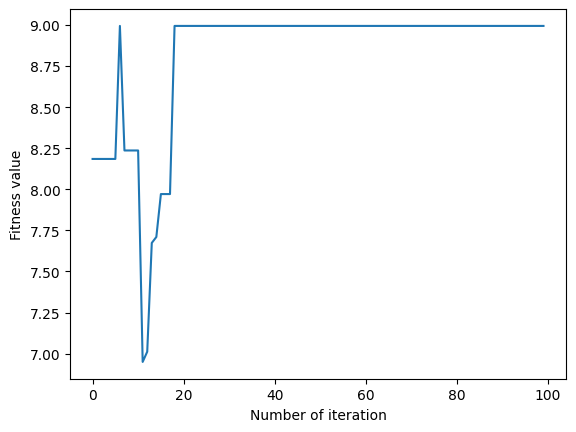

In [152]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(0,len(pocket))], pocket)
plt.xlabel('Number of iteration')
plt.ylabel('Fitness value')

### สังเกตว่า ยิ่งจำนวนรอบเพิ่มขึ้น จะทำให้สถานที่ที่ปลาเลือกไปคะแนนเพิ่มขึ้นด้วย นั่นคือ คะแนนความน่าอยู่แปรผันตรงกับจำนวนรอบ ซึ่งตรงตามหลักแนวคิดที่ระบุไว้ข้างต้น